In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the stock data into a pandas dataframe
df = pd.read_csv('TSLA.csv')

In [3]:
# Define a function to identify the Hanging Man pattern
def is_hanging_man(row):
    # Check that the pattern exists
    if len(df) < 2 or row.name < 1:
        return False
    # Check that the pattern is a Hanging Man
    prev_close = df.loc[row.name - 1, 'Close']
    prev_high = df.loc[row.name - 1, 'High']
    prev_low = df.loc[row.name - 1, 'Low']
    prev_open = df.loc[row.name - 1, 'Open']
    prev_body = prev_close - prev_open
    curr_close = row['Close']
    curr_open = row['Open']
    curr_high = row['High']
    curr_body = curr_close - curr_open
    if (curr_close < curr_open) and (prev_high - curr_close) >= (2 * curr_body) and (prev_open - curr_open) <= (0.2 * curr_body) and (prev_close - curr_close) <= (0.2 * curr_body):
        return True
    else:
        return False

# Identify the Hanging Man patterns in the data
hanging_man_mask = df.apply(is_hanging_man, axis=1)
hanging_man_dates = df[hanging_man_mask]['Date']

In [4]:
# Print out the dates of the patterns
print('Dates of Hanging Man patterns:')
for date in hanging_man_dates:
    print(date)

Dates of Hanging Man patterns:
2022-08-04
2022-08-10
2022-08-24
2022-09-27
2022-11-15
2023-02-23
2023-03-27
2023-03-30


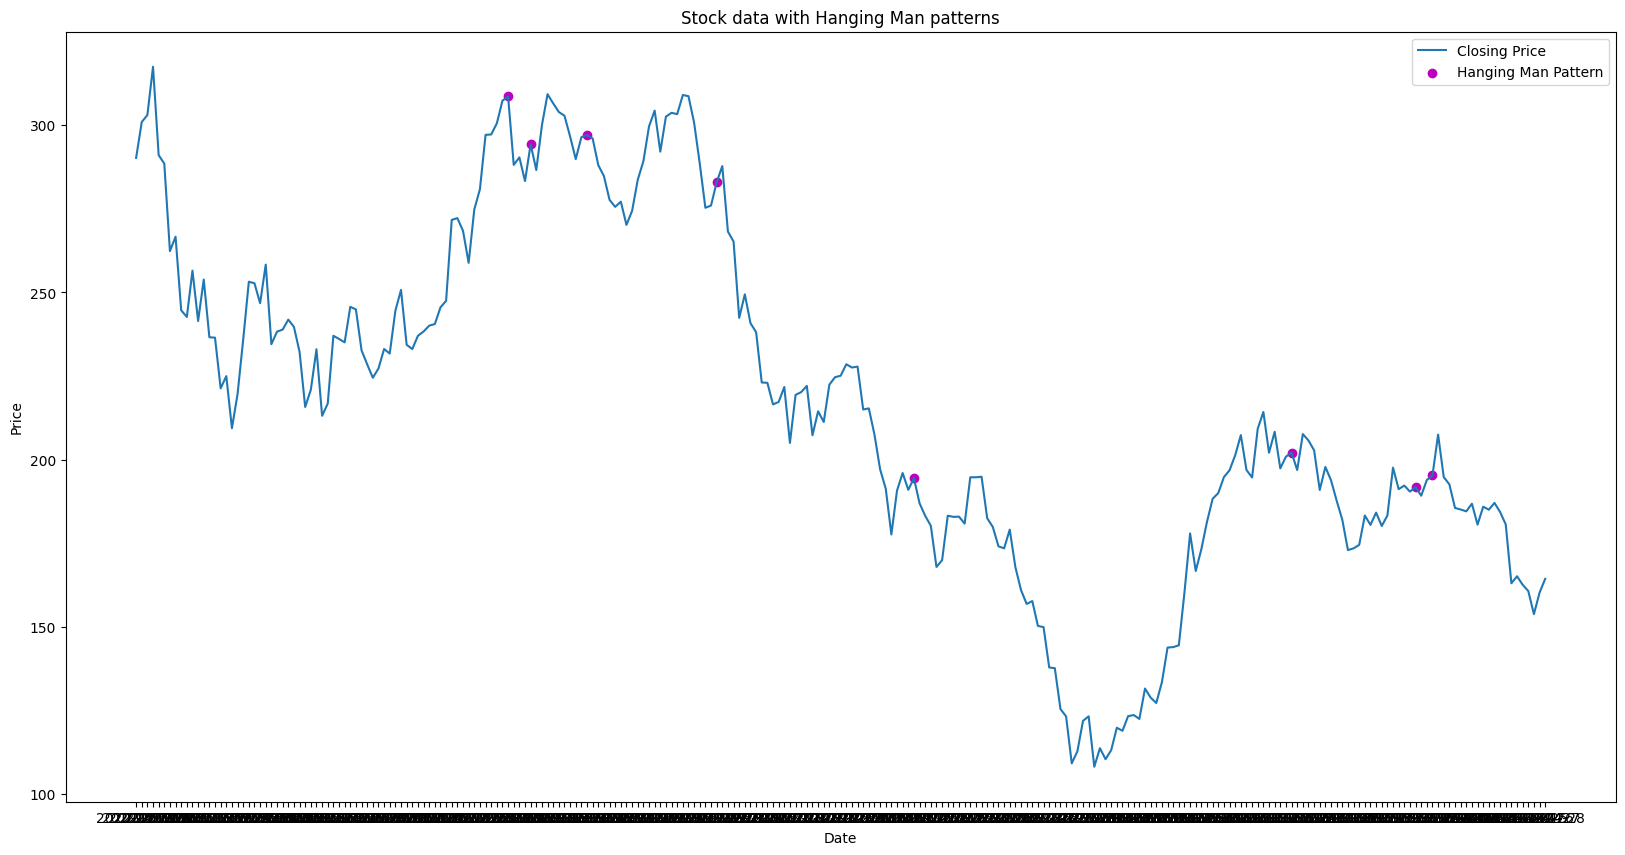

In [6]:
# Plot the stock data with the patterns highlighted
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(df['Date'], df['Close'], label='Closing Price')
ax.scatter(hanging_man_dates, df[hanging_man_mask]['Close'], color='m', label='Hanging Man Pattern')
ax.set_title('Stock data with Hanging Man patterns')
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.legend()
plt.show()